In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


mnist = fetch_openml("mnist_784")


print("Input data shape:", mnist.data.shape)
print("Target data shape:", mnist.target.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Input data shape: (70000, 784)
Target data shape: (70000,)


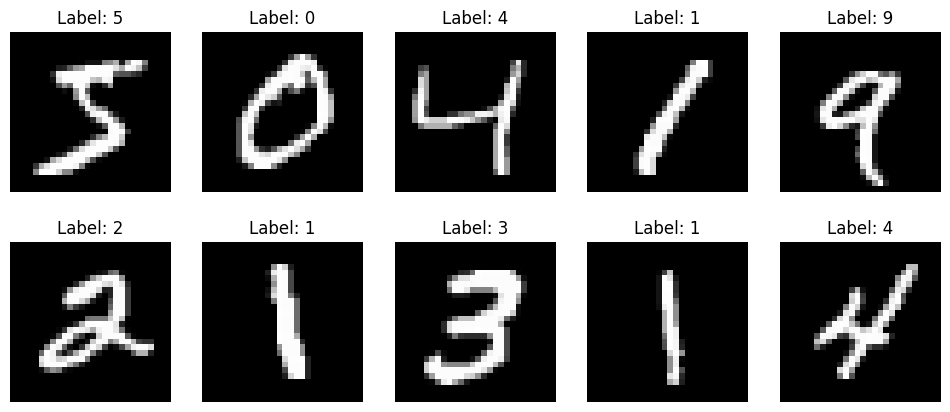

In [2]:
X = mnist.data.astype(float)
X_matrix = X.values


X_images = np.reshape(X_matrix, (70000, 28, 28))



plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_images[i], cmap='gray')
    plt.title(f"Label: {mnist.target[i]}")
    plt.axis('off')

plt.show()

In [3]:
X_matrix = mnist.data.astype(float)
y_vector = mnist.target.astype(int)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_vector, test_size=0.3, random_state=42)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (49000, 784)
y_train shape: (49000,)
X_test shape: (21000, 784)
y_test shape: (21000,)


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

ffn = MLPClassifier(hidden_layer_sizes=(32,), max_iter=5, random_state=42)


ffn.fit(X_train, y_train)

y_train_pred = ffn.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
y_test_pred = ffn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Testing Dataset:", test_accuracy)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

print("Precision on Testing Dataset:", precision)
print("Recall on Testing Dataset:", recall)
print("F1 Score on Testing Dataset:", f1_score)

Accuracy on Testing Dataset: 0.9532857142857143
Precision on Testing Dataset: 0.9532504640621651
Recall on Testing Dataset: 0.9532857142857143
F1 Score on Testing Dataset: 0.9532204606732287


In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_test_pred)

conf_matrix

array([[2004,    2,    7,    1,    3,    7,   19,    5,   10,    0],
       [   0, 2323,   13,   14,    2,    2,    1,    3,    4,    2],
       [   6,   21, 2024,   11,   13,    5,    8,   18,   18,    9],
       [   5,    7,   27, 2047,    1,   23,    4,   23,   22,   17],
       [   3,    7,    8,    1, 1853,    0,    7,    8,    3,   46],
       [   9,    3,    1,   47,    5, 1801,   16,    7,   23,    3],
       [   8,    8,    4,    1,   17,   14, 2026,    3,    7,    0],
       [   5,   10,   23,    5,   12,    4,    0, 2161,    4,   24],
       [   6,   33,   10,   32,    8,   27,   10,   15, 1828,   23],
       [  10,   10,    7,   17,   43,    3,    0,   31,   17, 1952]])